In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
import os
path = 'income.csv'
data = pd.read_csv(path, header = None)
data.head()
# 第56、57行数据值浮动较大，需要预处理

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,1,0.0,0.00,1.13,0.0,0.37,0.00,0.00,0.0,0.00,...,0.0,0.145,0.000,0.436,0.000,0.0,1.792,55,147,0
1,2,0.0,0.00,0.60,0.0,0.00,0.60,0.00,0.0,0.60,...,0.0,0.143,0.047,0.191,0.143,0.0,2.041,31,196,1
2,3,0.0,0.00,0.48,0.0,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.000,0.450,0.000,0.0,1.138,4,41,0
3,4,0.0,0.51,0.00,0.0,0.51,0.51,1.02,0.0,0.00,...,0.0,0.142,0.000,0.071,1.212,0.0,7.025,130,281,1
4,5,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.64,...,0.0,0.116,0.000,0.232,0.000,0.0,1.551,6,45,0


In [61]:
data.shape

(4000, 59)

Text(0, 0.5, 'Frequency')

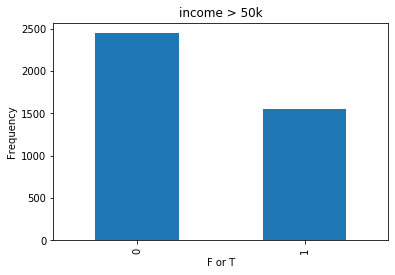

In [62]:
count_classes = pd.value_counts(data[58], sort = True).sort_index()
count_classes.plot(kind = 'bar')#kind = 'bar',表示画条形图
plt.title("income > 50k")
plt.xlabel("F or T")
plt.ylabel("Frequency")

可以发现样本中收入大于60k和小于的差距不是特别悬殊，故暂时不对样本进行均衡处理

均衡处理方案：下采样（同样少）、过采样（同样多）

55、56、57三列分布差异较前面的行分布差异较大，因此对其进行处理，处理之后变为norm56和norm57两列
标准化之后原来的55、56、57两列就不需要了，所以可以删除这三列，同时第0行的id也不需要，所以也删除

In [63]:
from sklearn.preprocessing import StandardScaler

data[59] = StandardScaler().fit_transform(data[55].values.reshape(-1, 1))
data[60] = StandardScaler().fit_transform(data[56].values.reshape(-1, 1))
data[61] = StandardScaler().fit_transform(data[57].values.reshape(-1, 1))
data = data.drop([0, 55, 56, 57], axis = 1)   #去掉列
data.head()

,1,2,3,4,5,6,7,8,9,10,...,49,50,51,52,53,54,58,59,60,61
0,0.0,0.00,1.13,0.0,0.37,0.00,0.00,0.0,0.00,0.0,...,0.0,0.145,0.000,0.436,0.000,0.0,0,-0.103960,0.013458,-0.238062
1,0.0,0.00,0.60,0.0,0.00,0.60,0.00,0.0,0.60,0.0,...,0.0,0.143,0.047,0.191,0.143,0.0,1,-0.096448,-0.104431,-0.150551
2,0.0,0.00,0.48,0.0,0.00,0.00,0.00,0.0,0.00,0.0,...,0.0,0.000,0.000,0.450,0.000,0.0,0,-0.123691,-0.237055,-0.427374
3,0.0,0.51,0.00,0.0,0.51,0.51,1.02,0.0,0.00,0.0,...,0.0,0.142,0.000,0.071,1.212,0.0,1,0.053915,0.381859,0.001256
4,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.64,0.0,...,0.0,0.116,0.000,0.232,0.000,0.0,0,-0.111231,-0.227231,-0.420230


#### 交叉验证
按照实验要求，将数据集中前3000项作为训练集train_data，后1000项作为测试集test_data

In [116]:
X = data.loc[:,data.columns != 58]
y = data.loc[:,data.columns == 58]

In [117]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print("Number transactions train dataset: ", len(X_train))
print("Number transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))

Number transactions train dataset:  3000
Number transactions test dataset:  1000
Total number of transactions:  4000


In [118]:
X_train[:5]

,1,2,3,4,5,6,7,8,9,10,...,48,49,50,51,52,53,54,59,60,61
678,0.0,0.0,0.00,0.0,0.00,0.00,0.0,5.88,0.0,0.0,...,0.0,0.000,0.000,0.0,0.000,0.000,0.0,-0.127854,-0.251791,-0.482738
2427,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,...,0.0,0.000,0.000,0.0,0.111,0.223,0.0,-0.104926,-0.227231,-0.343434
3574,0.0,0.0,0.00,0.0,0.00,1.12,0.0,0.00,0.0,0.0,...,0.0,0.000,0.392,0.0,3.333,0.000,0.0,-0.081062,-0.197759,-0.368437
1119,0.0,0.0,1.33,0.0,1.78,0.44,0.0,0.44,0.0,0.0,...,0.0,0.078,0.078,0.0,0.000,0.000,0.0,-0.111533,-0.232143,-0.434517
2931,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,...,0.0,0.000,0.000,0.0,0.000,0.000,0.0,-0.062900,-0.070047,-0.354149


In [119]:
y_train[:5]

,58
678,0
2427,0
3574,1
1119,1
2931,0


recall:召回率，模型评估标准，计算模型效果
recall = TP / (TP+FN)

                    相关(Relevant),正类        无关(NonRelevant),负类
                    
被检索到(Retrieved)       true positive(TP)         false positive(FP)
                     正的判断为正           负的判断为正的
                     
未被检索到(Not Retrieved)    false negatives(FN)       true negatives(TN)
                     正的判断为负的          负的判断为负的
                     
例：班级有80男，20女，共100人，当前目标是找出所有女生
现在一个人在100人中挑出了50个人，其中20人是女生
显然是错误的把30个男生也当作女生
这个例子中：TP=20   FP=30    FN=0     TN=50

KFold：交叉验证切分为几份

cross_val_score:交叉验证评估的结果

confusion_matrix:混淆矩阵

recall_score:

classification_report:

In [80]:
from sklearn.linear_model import LogisticRegression #逻辑回归
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix, recall_score, classification_report

正则化

正则化惩罚项:

L2正则化：loss + 0.5w^2

L1正则化：loss + |w|

c*L1 :c惩罚力度

### 对于LogisticRegression的参数

#### penalty参数：
在调参时如果我们主要的目的只是为了解决过拟合，一般penalty选择L2正则化就够了。但是如果选择L2正则化发现还是过拟合，即预测效果差的时候，就可以考虑L1正则化。另外，如果模型的特征非常多，我们希望一些不重要的特征系数归零，从而让模型系数稀疏化的话，也可以使用L1正则化。

#### 参数solver: 
liblinear：使用了开源的liblinear库实现，内部使用了坐标轴下降法来迭代优化损失函数。

sag：即随机平均梯度下降，是梯度下降法的变种，和普通梯度下降法的区别是每次迭代仅仅用一部分的样本来计算梯度，适合于样本数据多的时候，SAG是一种线性收敛算法，这个速度远比SGD快。



In [92]:
def printing_KFold_scores(x_train_data, y_train_data):
    fold = KFold(5, shuffle = False)
    
    # different C parameters
    c_param_range = [0.01, 0.1, 1, 10, 100]
    
    results_table = pd.DataFrame(index = range(len(c_param_range), 2), columns  = ['C_parameter', 'Mean recall score'])
    results_table['C_parameter'] = c_param_range
    
    # the k-fold will give 2 lists : train_indices = indices[0], test_indices = indices[1]
    j = 0
    # 外层循环寻找最合适的C值
    for c_parma in c_param_range:
        print('---------------------')
        print('C parameter: ', c_parma)
        print('---------------------')
        print('')
        
        recall_accs  = []
        # 内层循环交叉验证
        for iteration, indices in enumerate(fold.split(x_train_data), start = 1):
            # call the logistic regression model with a certain C parameter
            # 加上solver = "liblinear"
            # 实例化逻辑回归模型，选L1惩罚
            lr = LogisticRegression(C = c_parma, penalty = 'l1', solver = "liblinear")
            
            # use the train data to fit the model. use the portion of the fold to train
            # with indices[0].we then predict on the portion assigned as the 'test cross calidation' with in 
            lr.fit(x_train_data.iloc[indices[0],:], y_train_data.iloc[indices[0],:].values.ravel())
            
            # predict values using the test indices in the training data
            y_pred_undersample = lr.predict(x_train_data.iloc[indices[1],:].values)
            
            # calculate the recall score and append it to a list for recall scores representing the current
            recall_acc = recall_score(y_train_data.iloc[indices[1],:].values, y_pred_undersample)
            recall_accs.append(recall_acc)
            print('Iteration ', iteration, ': recall score = ', recall_acc)
            
        # the main value of those recall scores is the metric we want to save and get hold og
        results_table.loc[j, 'Mean recall score'] = np.mean(recall_accs)
        j += 1
        print('')
        print('Mean recall score ', np.mean(recall_accs))
        print('')
        
    best_c = results_table.loc[results_table['Mean recall score'].astype(float).idxmax()]['C_parameter']
    # final we can check which C parameter is the best among the chosen 
    print('*****************************************')
    print('Best model to choose from cross validation is with C parameter = ', best_c)
    print('*****************************************')
    
    return best_c

In [93]:
best_c = printing_KFold_scores(X_train, y_train)

---------------------
C parameter:  0.01
---------------------

Iteration  1 : recall score =  0.7743362831858407
Iteration  2 : recall score =  0.8095238095238095
Iteration  3 : recall score =  0.7857142857142857
Iteration  4 : recall score =  0.8310502283105022
Iteration  5 : recall score =  0.7276422764227642

Mean recall score  0.7856533766314404

---------------------
C parameter:  0.1
---------------------

Iteration  1 : recall score =  0.8451327433628318
Iteration  2 : recall score =  0.8354978354978355
Iteration  3 : recall score =  0.8823529411764706
Iteration  4 : recall score =  0.867579908675799
Iteration  5 : recall score =  0.8577235772357723

Mean recall score  0.8576574011897419

---------------------
C parameter:  1
---------------------

Iteration  1 : recall score =  0.8893805309734514
Iteration  2 : recall score =  0.8484848484848485
Iteration  3 : recall score =  0.907563025210084
Iteration  4 : recall score =  0.8767123287671232
Iteration  5 : recall score =  0.8

#### 混淆矩阵


In [107]:
def plot_confusion_matrix(cm, classes, title = 'Confusion matrix', cmap = plt.cm.Blues):
    # this fuction is used tp print the confusion matrix
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], 
                 horizontalalignment='center', 
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predict label')

recall metric in the test data:  0.8730964467005076
accuracy in the test data:  0.923


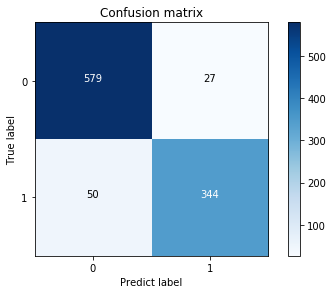

In [111]:
import itertools
lr = LogisticRegression(C = best_c, penalty = 'l1', solver = "liblinear")
lr.fit(X_train, y_train.values.ravel())
y_pred = lr.predict(X_test.values)

# confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision = 2)

print("recall metric in the test data: ", cnf_matrix[1, 1]/(cnf_matrix[1, 0] + cnf_matrix[1, 1]))
print("accuracy in the test data: ", (cnf_matrix[1, 1] + cnf_matrix[0, 0]) / (cnf_matrix[1,1]+cnf_matrix[1,0]+cnf_matrix[0,1]+cnf_matrix[0,0]))
# plot non-normalized confusion matrix
class_names = [0, 1]
plt.figure()
plot_confusion_matrix(cnf_matrix,
                     classes=class_names,
                     title = 'Confusion matrix')
plt.show()

recall = tp / (tp + fn) = 344 / (344+50) = 0.8730964467005076

精度值 = [0, 0]+[1, 1] / 1000  = 0.923

#### 逻辑回归阈值对结果的影响
一般的对于sigmoid函数认为概率大于0.5，分类为1否则分类为0

当调整这个阈值0.5为其他值的时候，研究其对召回率和精确率的影响

--------------------------------
current thershold:  0.1
recall metric in the test data:  0.9822335025380711
accuracy in the test data:  0.829
--------------------------------
--------------------------------
current thershold:  0.2
recall metric in the test data:  0.9517766497461929
accuracy in the test data:  0.901
--------------------------------
--------------------------------
current thershold:  0.3
recall metric in the test data:  0.9238578680203046
accuracy in the test data:  0.921
--------------------------------
--------------------------------
current thershold:  0.4
recall metric in the test data:  0.9035532994923858
accuracy in the test data:  0.927
--------------------------------
--------------------------------
current thershold:  0.5
recall metric in the test data:  0.8730964467005076
accuracy in the test data:  0.923
--------------------------------
--------------------------------
current thershold:  0.6
recall metric in the test data:  0.8375634517766497
accuracy in

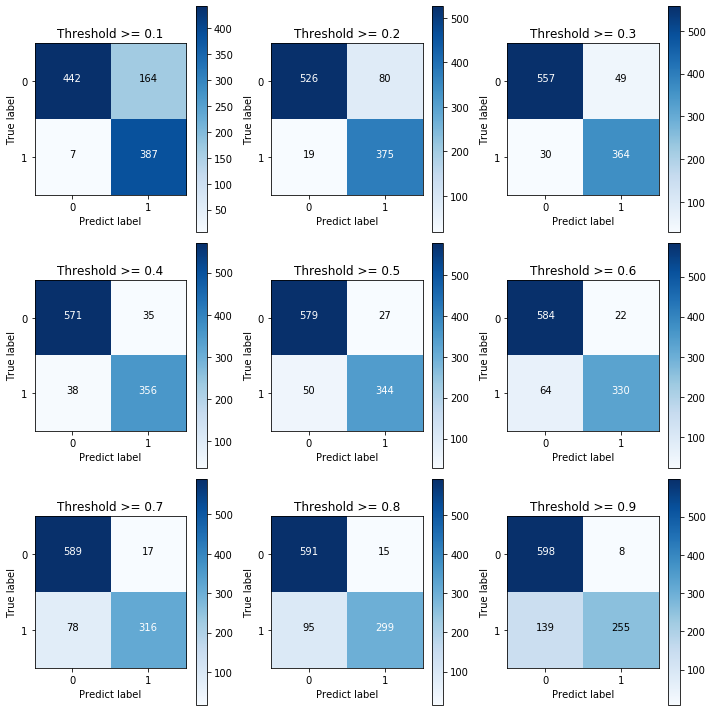

In [115]:
lr = LogisticRegression(C = best_c, penalty = 'l1', solver = "liblinear")
lr.fit(X_train, y_train.values.ravel())
y_pred_proba = lr.predict_proba(X_test.values)
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
plt.figure(figsize=(10, 10))

j = 1
for i in thresholds:
    y_test_predictions_high_recall = y_pred_proba[:,1] > i
    plt.subplot(3,3,j)
    j += 1
    
    #print the confusion matrix
    cnf_matrix = confusion_matrix(y_test, y_test_predictions_high_recall)
    np.set_printoptions(precision=2)
    print('--------------------------------')
    print("current thershold: ",i)
    print("recall metric in the test data: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
    print("accuracy in the test data: ", (cnf_matrix[1, 1] + cnf_matrix[0, 0]) / (cnf_matrix[1,1]+cnf_matrix[1,0]+cnf_matrix[0,1]+cnf_matrix[0,0]))
    print('--------------------------------')
    # plot non-normalized confusion matrix
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix,
                         classes=class_names,
                         title='Threshold >= %s'%i)